## **MelodyMatch : Music Recommendation System**🎵

        

---







**Introduction:**

Finding new songs you will like can be hard because there are so many songs and artists out there. MelodyMatch is a simple music recommendation system that helps you discover songs similar to your favorites.

This system looks at the artist, song title, and lyrics or text related to songs to find music that sounds like what you already enjoy. It uses a method called TF-IDF to convert song text into numbers and then compares songs using a similarity score.

When you enter a song you like, MelodyMatch suggests other songs that are similar based on the text data. It shows you the recommended songs along with their artist names, making it easy for you to explore new music.

MelodyMatch is designed to make music discovery easy and fun by giving you personalized song recommendations with just a few clicks.

**Installing and importing all the libraries**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


**Data Collection**

In [ ]:
df = pd.read_csv("/content/spotify_millsongdata.csv")



**Exploratory Data Analysis**

In [ ]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
df.shape

(57650, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


<ipython-input-83-3426639055>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


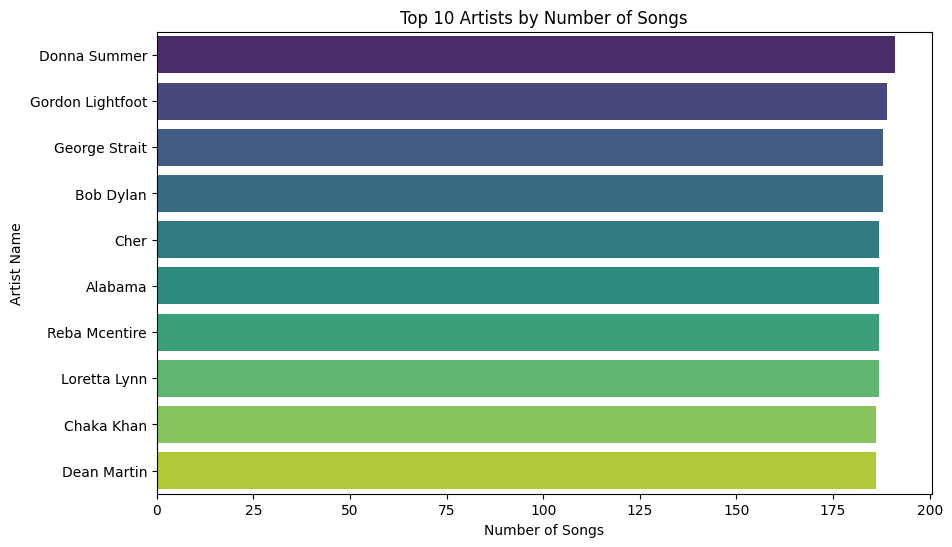

In [ ]:
top_artists = df.groupby('artist').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()


In [ ]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [ ]:
df.shape

(10000, 3)

In [ ]:
df.head()

,artist,song,text
0,Gary Numan,Dark,I've been waiting here \r\nWaiting for faith ...
1,Nickelback,Because Of You,"Hands on the mirror, can't get much clearer \..."
2,Engelbert Humperdinck,Help Me Make It Through The Night,Take the ribbon from your hair \r\nShake it l...
3,Kelly Family,Key To My Heart,There's a part of my heart \r\nWide and open ...
4,Nazareth,May The Sunshine,"May the sun, the sun shine bright \r\nMay the..."


In [ ]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="grey").generate(all_lyrics)

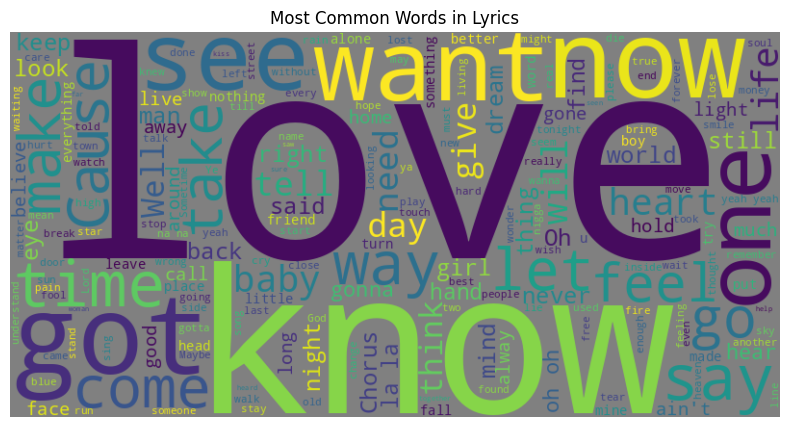

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()


**Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
artist,0
song,0
text,0


In [ ]:

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

**Apply preprocessing to lyrics**

In [ ]:


df['cleaned_text'] = df['text'].apply(preprocess_text)


In [ ]:
df.head()

,artist,song,text,cleaned_text
0,Gary Numan,Dark,I've been waiting here \r\nWaiting for faith ...,ive waiting waiting faith word fall darkness c...
1,Nickelback,Because Of You,"Hands on the mirror, can't get much clearer \...",hands mirror cant get much clearer cant make g...
2,Engelbert Humperdinck,Help Me Make It Through The Night,Take the ribbon from your hair \r\nShake it l...,take ribbon hair shake loose let fall lay soft...
3,Kelly Family,Key To My Heart,There's a part of my heart \r\nWide and open ...,theres part heart wide open key heart could go...
4,Nazareth,May The Sunshine,"May the sun, the sun shine bright \r\nMay the...",may sun sun shine bright may sun shine bright ...


**Convert combined features into numerical vectors using TF-IDF**

In [ ]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

**Cosine Similarity**

In [ ]:

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

**Recommendation Function**

In [ ]:


def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"
    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    return df[['artist', 'song']].iloc[song_indices]


In [ ]:
df["song"][3]

'Key To My Heart'

**Example Recommendation**

In [ ]:

print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs('Key To My Heart')
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
               artist               song
3654  Ten Years After       Going To Try
5076    Stevie Wonder  My Eyes Don't Cry
577      Janis Joplin                Try
2230   Britney Spears          Don't Cry
5941     Eric Clapton   Don't Cry Sister


**Visualize Recommendations**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_recommendations(song_name, top_n=5):
    recommended_songs = recommend_songs(song_name, top_n=top_n)

    if isinstance(recommended_songs, str):
        print(recommended_songs)
        return

    # Prepare data for visualization
    recommended_songs['recommendation'] = recommended_songs['artist'] + ' - ' + recommended_songs['song']

    plt.figure(figsize=(10, 6))
    sns.barplot(x=recommended_songs.index, y=recommended_songs['recommendation'], palette='viridis')
    plt.title(f"Recommended Songs for '{song_name}'", fontsize=16)
    plt.xlabel('Recommended Songs', fontsize=12)
    plt.ylabel('Artist - Song', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


**Example usage**

<ipython-input-116-2430433570>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommended_songs.index, y=recommended_songs['recommendation'], palette='viridis')


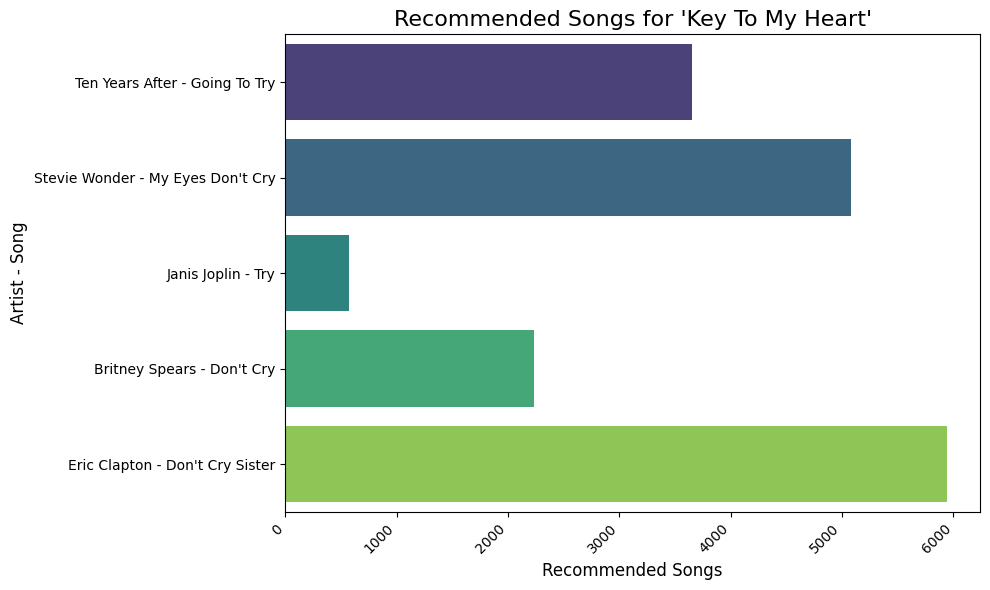

In [ ]:

visualize_recommendations("Key To My Heart", top_n=5)